# Sentiment Analysis

## Task Performed 

1) Fetch one month of data of coronavirus from twitter before it's outbreak and after outbreak and compare peoples emotion.
              -Use NLTK library for tokenization and for stopwords..
              
2) Pick your choice of document and update the emotion document accordingly (you document words and associated emotion where applicable) and analyse the sentiments of people.

3) Pick your own document (say A) and create BOW using a count vectorizer. Use another document (say B) and identify how many words of the B document are present in the BOW of A. 

## Task1

In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import pandas as pd
import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
import nltk
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

In [2]:
def scrap_tweets(since,until):
    tweetCriteria=got.manager.TweetCriteria().setQuerySearch('#CoronaVirus')\
                     .setSince(since)\
                     .setUntil(until)\
                     .setMaxTweets(1000)
    
    tweet=got.manager.TweetManager.getTweets(tweetCriteria)
    
    tweet_text=[[tweet.text]for tweet in tweet]
    return tweet_text


# Before coronavirus outbreak
text_tweets_before=scrap_tweets("2020-01-01","2020-01-30")

# After coronavirus outbreak
text_tweets_after=scrap_tweets("2020-03-01","2020-04-01")

length=len(text_tweets_before)
text_before = ""
text_after = ""
for i in range(0,length):
    text_before=text_tweets_before[i][0]+ " " + text_before
    text_after=text_tweets_after[i][0]+ " " + text_after

# Convert to lowercase 
lower_case_before = text_before.lower()
lower_case_after = text_after.lower()

# Remove punctuation characters
cleaned_text_before=lower_case_before.translate(str.maketrans('','',string.punctuation))
cleaned_text_after=lower_case_after.translate(str.maketrans('','',string.punctuation))

# Split text into words
tokenized_words_before=cleaned_text_before.split()
tokenized_words_after=cleaned_text_after.split()

In [3]:
cleaned_text_before

'as amapresident notes a group of vulnerable australians who through no fault of their own found themselves at the epicentre of a significant outbreak and they must be under a lot of stress and fear and concern coronavirus ncov2019 wuhan china  médicos padecen de ansiedad ante su frustración por no poder ayudar a los miles de pacientes que llenan los hospitales infectados con el mortal coronavirus  guayas  con el fin de socializar las medidas preventivas ante eventual presencia del coronavirus personal del centro de salud y hospital básico playas dieron charlas en áreas de obstetricia pediatría consulta externa y salas de espera corona  coronavirus  todos kilombo por el coronavirus tranquilo na los perros apenas podemos sobrevivir al dengue algunos trajeron sarampión y fiebre amarilla del brasil vamo a calmarno this is a lie canadiangovernment right now legit there are passengers who are sick at pearsonairport the gates to come in coronavirus china screeneveryone canada coronavirus on 

In [4]:
len(tokenized_words_before)

21820

In [5]:
cleaned_text_after

'birthday coronavirus my birthday in quarantine i can’t imagine doing it without my best friendmy wife  celebritiespaidmybills let’s make this a thing check to check is hard it’s even harder when you can’t work here is how you can help instead of showing us your sweet set up for staying home i’ll submit my bill and you help me serviceindustry iwanttohelp coronavirus tus primeros 700por trabajar con tus redes sociales desde tu casa al horario que tu mismo te pongas  httpsbitly3difil3 1abril eeuu latinos latinoamerica covid19 coronavirus emprende sale setujefe oferta check out the new centers policy series centering on coronavirus which proves insights and analyses of how covid19 is progressing and how it is affecting our economy society and health care system not follow but beware the money trail literally i have the impression now that much of the coronavirus has spread through the exchange of paper money and coins especially think of it oils and moisture applied to absorbant and hard 

In [6]:
len(tokenized_words_after)

23474

In [7]:
cleaned_text_after

'birthday coronavirus my birthday in quarantine i can’t imagine doing it without my best friendmy wife  celebritiespaidmybills let’s make this a thing check to check is hard it’s even harder when you can’t work here is how you can help instead of showing us your sweet set up for staying home i’ll submit my bill and you help me serviceindustry iwanttohelp coronavirus tus primeros 700por trabajar con tus redes sociales desde tu casa al horario que tu mismo te pongas  httpsbitly3difil3 1abril eeuu latinos latinoamerica covid19 coronavirus emprende sale setujefe oferta check out the new centers policy series centering on coronavirus which proves insights and analyses of how covid19 is progressing and how it is affecting our economy society and health care system not follow but beware the money trail literally i have the impression now that much of the coronavirus has spread through the exchange of paper money and coins especially think of it oils and moisture applied to absorbant and hard 

In [8]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","also",'i', 'me', 'my', 'myself', 
              'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
              'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
              'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
              "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
              'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
              'should','now'
              'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
              'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
              'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll',
              'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
              "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn',
              "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","would","could","mr","ms"]

# Removing stop words from the tokenized words list
final_words_before = [word for word in tokenized_words_before if word not in stop_words]
# Removing stop words from the tokenized words list
final_words_after = [word for word in tokenized_words_after if word not in stop_words]

# Lemmatization - From plural to single + Base form of a word (example better-> good)
#nltk.download('wordnet')
lemma_words_before = []
lemma_words_after = []
final_words=[final_words_before,final_words_after]
for i in final_words:
    for word in i:
        word = WordNetLemmatizer().lemmatize(word)
        if i==final_words_before:
            lemma_words_before.append(word)
        if i==final_words_after:
            lemma_words_after.append(word)

## Task 2

People emotions before the outbreak 
 [' attracted', ' fearful', ' angry', ' surprise', ' sad', ' safe', ' adequate', ' average', ' attracted', ' surprise', ' powerless', ' angry', ' hated', ' cheated', ' fearful', ' powerless', ' free', ' fearful', ' angry', ' happy', ' sad', ' happy', ' entitled', ' alone', ' sad', ' happy', ' angry', ' attracted', ' fearful', ' adequate', ' powerless', ' alone', ' free', ' adequate', ' sad', ' surprise', ' esteemed', ' surprise', ' anxious', ' fearful', ' entitled', ' attached', ' belittled', ' powerless', ' powerless', ' fearful', ' loved', ' fearful', ' alone', ' embarrassed', ' average', ' focused', ' angry', ' happy', ' sad', ' hated', ' fearful', ' entitled', ' anxious'] 
 

People emotions after the outbreak 
 [' attracted', ' esteemed', ' powerless', ' sad', ' fearless', ' bored', ' fearless', ' fearful', ' average', ' attracted', ' surprise', ' attached', ' attracted', ' happy', ' fearful', ' sad', ' focused', ' powerless', ' free', ' single

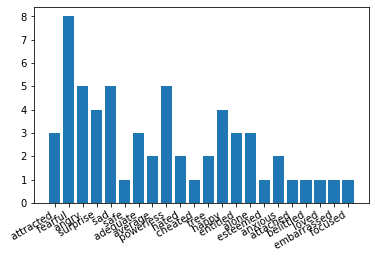

************************************************************************************************************************

     ******Negative Sentiment*******
{'neg': 0.092, 'neu': 0.819, 'pos': 0.089, 'compound': -0.9992}


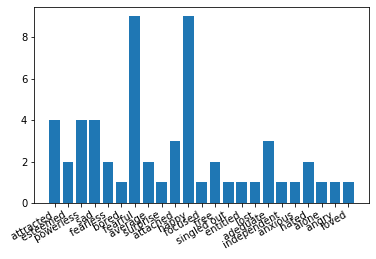

In [9]:
emotion_before = []
emotion_after = []
lemma_words=[lemma_words_before,lemma_words_after]
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        for i in lemma_words:
            if word in i:
                if i==lemma_words[0]:
                    emotion_before.append(emotion)
                if i==lemma_words[1]:
                    emotion_after.append(emotion)
            
print("People emotions before the outbreak \n", emotion_before, '\n \n')
print("People emotions after the outbreak \n", emotion_after, '\n \n')

count_before = Counter(emotion_before)
count_after = Counter(emotion_after)

print("Count of each emotion before outbreak \n", count_before,'\n \n')
print("Count of each emotion after outbreak \n", count_after)

# lets define the function to check the Negative and Positive sentiment
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
    else:
        print("Neutral Sentiment")
print("\n")      
print("*"*120)
print("\n")      
print("Graphical representation of Sentiment Analyzer")
print("\n")      
print("*"*120)  
# Calling sentiment_analyse function
sentiment_analyse(cleaned_text_before)
# Test how SentimentIntensityAnalyzer works
print(SentimentIntensityAnalyzer().polarity_scores(cleaned_text_before))
fig, ax1 = plt.subplots()
ax1.bar(count_before.keys(), count_before.values())
fig.autofmt_xdate()
plt.savefig('graph_before.png')
plt.show()
print("*"*120)

sentiment_analyse(cleaned_text_after)
print(SentimentIntensityAnalyzer().polarity_scores(cleaned_text_after))
fig, ax1 = plt.subplots()
ax1.bar(count_after.keys(), count_after.values())
fig.autofmt_xdate()
plt.savefig('graph_after.png')
plt.show()

## Sentiments Conclusion from the above graphs:         
1) People are more negative after the outbreak as compared to how they are before they outbreak.                     
2) People are happy after the corona outbreak as they are spending quality time with the family during the lockdown period.  
3) Level of fearfulness is increased.            
4) After the outbreak people feels more bore at home.

## Task 3

In [10]:
# Taking cleaned text before the coronavirus outbreak
document1=[cleaned_text_before]

# Taking cleaned text after the coronavirus outbreak
document2=[cleaned_text_after]

cv=CountVectorizer()
for i,j in enumerate([document1,document2]):
    cv.fit_transform(j)
    if i==0:
        k='before'
        print(f"Bag of Words {k} Outbreak:\n",cv.get_feature_names())
        print("*" * 100)
        print(f"Original Indices {k} Outbreak:\n",cv.vocabulary_)
        print("*" * 100)

    else:
        k='after'
        print("*" * 100)
        print(f"Bag of Words {k} Outbreak:\n",cv.get_feature_names())
        print("*" * 100)
        print(f"Original Indices {k} Outbreak:\n",cv.vocabulary_)
    
    
    

    

Bag of Words before Outbreak:
 ['000', '004', '004030012020', '01252020', '0541', '0635น', '08101', '10', '100', '1000', '1032', '106', '10daysyoure', '1122', '115', '12', '12000', '12167', '122', '1220', '124', '125', '128', '129', '1292020', '13', '132', '13th', '14', '1439', '15', '155', '1554', '1589', '16', '160', '162', '164', '169', '17', '170', '1700', '1726', '1732', '1737', '177', '18', '1800', '18337844397', '186', '19', '195', '19h30', '1a', '1n', '1st', '1月10日到1月20日这十天究竟发生了什么', '20', '200', '2000', '20022003', '2003', '2012', '2014', '2015', '20172018', '2018', '2019', '2019ncov', '2020', '2020ncov', '2020年1月29日湖北省新型冠状病毒感染的肺炎疫情情况', '2021', '21', '210', '219', '22', '220', '23', '235', '24', '243', '247', '2478', '24hrs', '2563', '26', '2600', '2679', '2700', '28', '280', '28th', '29', '290120', '29012020', '2912020', '29ene', '2s', '2ªb', '2대로', '30', '3001', '30010050', '30012020', '3012', '30th', '31', '31012020', '33', '34', '34000', '3554', '37', '38歲的武漢大學中南醫院急救護士郭琴連續多

In [11]:
index=['bow_tweets_before','bow_tweets_after']
document=[cleaned_text_before,cleaned_text_after]
array_doc = cv.fit_transform(document)
df=pd.DataFrame(array_doc.toarray(),columns=cv.get_feature_names(),index=index)

In [12]:
# Lets compare document1(Bow1) and document2(Bow2) and print and calculate out common and uncommon words
common_words=[]
uncommon_words=[]
for j,i in enumerate(df):        
    if (df.iloc[1,j]!=0 and df.iloc[0,j]!=0):
        df.iloc[1,j]>=df.iloc[0,j] or df.iloc[1,j]==df.iloc[0,j]
        common_words.append(i)
    else :
        uncommon_words.append(i)
print("Common Words: ",len(common_words))
print("\n\nWords which are present/common in BOW of Document 2 and Document 1 are:\n\n",common_words)
print("Common Words: ",len(uncommon_words))
print("\n\nWords which are not present/common in BOW of Document 2 and Document 1 are:\n\n",uncommon_words)


Common Words:  2005


Words which are present/common in BOW of Document 2 and Document 1 are:

 ['000', '10', '100', '1000', '106', '12', '12000', '13', '14', '15', '16', '17', '18', '19', '195', '1n', '1st', '20', '2000', '2018', '2019', '2020', '21', '22', '23', '24', '247', '26', '28', '29', '30', '31', '33', '34', '40', '4000', '4pm', '50', '500', '5000', '52', '5pm', '600', '61000', '70', '80', '800', '99', 'abc', 'able', 'about', 'above', 'absolutely', 'acabo', 'accepting', 'access', 'according', 'accurate', 'act', 'action', 'actual', 'actualización', 'actually', 'acuerdo', 'additional', 'adhanom', 'adoptadas', 'advantage', 'advice', 'afectados', 'affairs', 'affected', 'affecting', 'afp', 'afraid', 'after', 'afternoon', 'again', 'against', 'age', 'aglomerações', 'ago', 'agora', 'ahead', 'ahora', 'ai', 'ainda', 'air', 'airborne', 'aircanada', 'airport', 'al', 'alert', 'alerta', 'alex', 'algo', 'alguien', 'algunos', 'all', 'allow', 'almost', 'alone', 'along', 'already', 'also', 'al

Conclusion:
    
    
>>Number of words which are common in Document2 and are also in Document 1 are: 2005